In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
import scipy as sp
import statsmodels.api as sm
from patsy import dmatrix

In [2]:
train_16 = pd.read_csv('train_2016_v2.csv',parse_dates=['transactiondate'],dtype={'parcelid':int})

In [3]:
prop_16 = pd.read_csv('properties_2016.csv',dtype={'fireplaceflag':object, 'taxdelinquencyflag':object, 'fireplaceflag':object, 'propertyzoningdesc':object, 'propertycountylandusecode':object, 'hashottuborspa':object})

In [4]:
train_df1 = pd.merge(train_16,prop_16,on='parcelid', how ='left')

In [5]:
train_df = train_df1.copy()

In [6]:
missing_df = train_df.isnull().sum().reset_index()
missing_df.columns = ['col','missing_cnt']
missing_df['missing_ratio'] = missing_df.missing_cnt / len(train_df)
missing_df.sort_values(by='missing_ratio',inplace=True)
missing_df.reset_index(inplace=True)

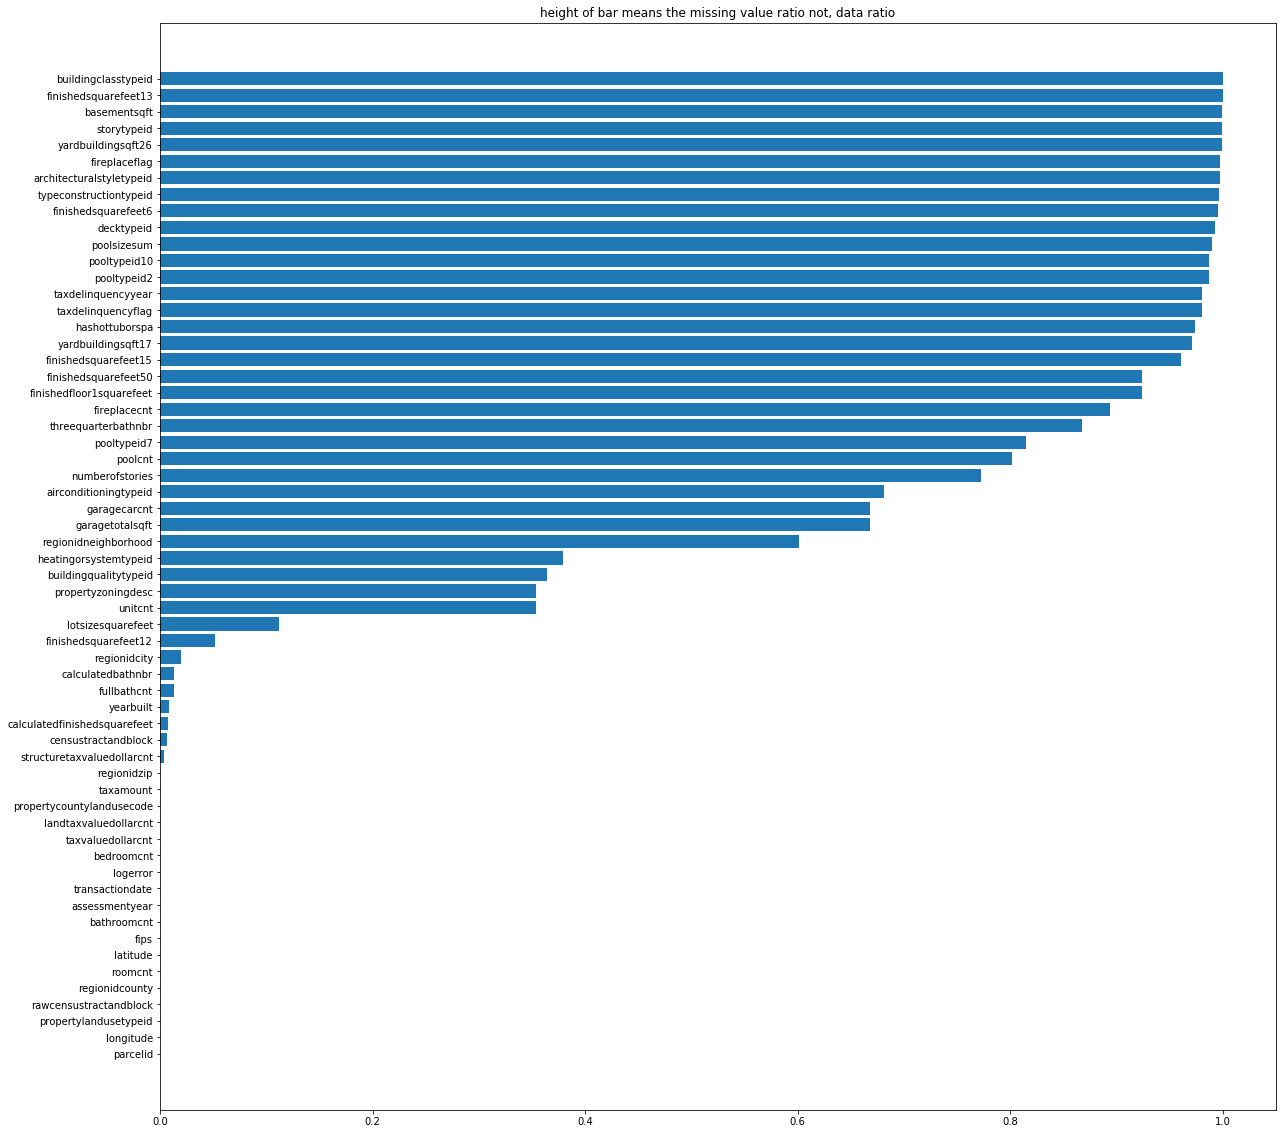

In [7]:
plt.figure(figsize=(20,20))
missing_df.tail()
plt.barh(missing_df.col,missing_df.missing_ratio)
plt.title('height of bar means the missing value ratio not, data ratio')
plt.show()

# filling the data

In [8]:
train_df.calculatedbathnbr = train_df.calculatedbathnbr.fillna(train_df.calculatedbathnbr.mode()[0])

In [9]:
train_df.fullbathcnt = train_df.fullbathcnt.fillna(train_df.fullbathcnt.mode()[0])

In [10]:
train_df.heatingorsystemtypeid = train_df.heatingorsystemtypeid.fillna(train_df.heatingorsystemtypeid.mode()[0])

In [11]:
train_df.heatingorsystemtypeid = train_df.heatingorsystemtypeid.astype('object')

In [12]:
train_df.garagecarcnt = train_df.garagecarcnt.fillna(train_df.garagecarcnt.mode()[0])

In [13]:
train_df.garagetotalsqft = train_df.garagetotalsqft.fillna(np.mean(train_df.garagetotalsqft))

In [14]:
train_df.airconditioningtypeid = train_df.airconditioningtypeid.fillna(train_df.airconditioningtypeid.mode()[0])

In [15]:
train_df.airconditioningtypeid = train_df.airconditioningtypeid.astype('object')

In [16]:
train_df.poolcnt = train_df.poolcnt.fillna(0)

In [17]:
train_df.poolcnt = train_df.poolcnt.astype('object')

In [18]:
train_df.pooltypeid7 = train_df.pooltypeid7.fillna(0)

In [19]:
train_df.pooltypeid7 = train_df.pooltypeid7.astype('object')

In [20]:
train_df.threequarterbathnbr = train_df.threequarterbathnbr.fillna(0)

In [21]:
train_df.hashottuborspa  = train_df.hashottuborspa .fillna('False')

In [22]:
train_df.fireplacecnt  = train_df.fireplacecnt .fillna(0)

In [23]:
train_df.pooltypeid2  = train_df.pooltypeid2 .fillna(0)

In [24]:
train_df.pooltypeid2 = train_df.pooltypeid2.astype('object')

In [25]:
train_df.pooltypeid10  = train_df.pooltypeid10 .fillna(0)

In [26]:
train_df.pooltypeid10 = train_df.pooltypeid10.astype('object')

In [27]:
train_df.poolsizesum  = train_df.poolsizesum .fillna(0)

In [28]:
train_df.fireplaceflag  = train_df.fireplaceflag .fillna('False')

In [29]:
train_df.yearbuilt = train_df.yearbuilt.fillna(train_df.yearbuilt.mode()[0])

In [30]:
train_df.unitcnt = train_df.unitcnt.fillna(train_df.unitcnt.mode()[0])

In [31]:
train_df.buildingqualitytypeid = train_df.buildingqualitytypeid.fillna(train_df.buildingqualitytypeid.mean())

In [32]:
train_df.numberofstories = train_df.numberofstories.fillna(train_df.numberofstories.mode()[0])

In [33]:
train_df.typeconstructiontypeid = train_df.typeconstructiontypeid.fillna('None')

In [34]:
train_df.typeconstructiontypeid = train_df.typeconstructiontypeid.astype('object')

In [35]:
train_df.architecturalstyletypeid = train_df.architecturalstyletypeid.fillna('None')

In [36]:
train_df.architecturalstyletypeid = train_df.architecturalstyletypeid.astype('object')

In [37]:
train_df.storytypeid = train_df.storytypeid.fillna('None')

In [38]:
train_df.storytypeid = train_df.storytypeid.astype('object')

In [39]:
train_df.buildingclasstypeid = train_df.buildingclasstypeid.fillna('None')

In [40]:
train_df.buildingclasstypeid = train_df.buildingclasstypeid.astype('object')

In [41]:
train_df.decktypeid = train_df.decktypeid.fillna('None')

In [42]:
train_df.decktypeid = train_df.decktypeid.astype('object')

In [43]:
train_df.propertycountylandusecode = train_df.propertycountylandusecode.fillna(train_df.propertycountylandusecode.mode()[0])

In [44]:
train_df.propertycountylandusecode = train_df.propertycountylandusecode.astype('object') 

In [45]:
train_df.propertylandusetypeid = train_df.propertylandusetypeid.astype('object') 

In [46]:
train_df.drop(columns='censustractandblock',inplace=True)

In [112]:
train_df.rawcensustractandblock = train_df.rawcensustractandblock.astype('float') 

In [49]:
train_df.fips = train_df.fips.astype('object') 

In [50]:
train_df.propertycountylandusecode = train_df.propertycountylandusecode.astype('object') 

In [51]:
train_df.regionidzip = train_df.regionidzip.fillna(train_df.regionidzip.mode()[0])

In [52]:
train_df.regionidzip = train_df.regionidzip.astype('object') 

In [53]:
train_df.regionidcity = train_df.regionidcity.fillna(train_df.regionidcity.mode()[0])

In [54]:
train_df.regionidcity = train_df.regionidcity.astype('object') 

In [55]:
train_df.propertyzoningdesc = train_df.propertyzoningdesc.fillna('None')

In [56]:
train_df.propertyzoningdesc = train_df.propertyzoningdesc.astype('object') 

In [57]:
train_df.regionidneighborhood = train_df.regionidneighborhood.fillna(np.mean(train_df.regionidneighborhood))

In [58]:
train_df.calculatedfinishedsquarefeet = train_df.calculatedfinishedsquarefeet.fillna(train_df.calculatedfinishedsquarefeet.mode()[0])

In [59]:
train_df.finishedsquarefeet12 = train_df.finishedsquarefeet12.fillna(train_df.finishedsquarefeet12.mode()[0])

In [60]:
train_df.lotsizesquarefeet = train_df.lotsizesquarefeet.fillna(train_df.lotsizesquarefeet.mode()[0])

In [61]:
train_df.finishedfloor1squarefeet = train_df.finishedfloor1squarefeet.fillna(0)

In [62]:
train_df.finishedsquarefeet50 = train_df.finishedsquarefeet50.fillna(0)

In [63]:
train_df.finishedsquarefeet15 = train_df.finishedsquarefeet15.fillna(0)

In [64]:
train_df.finishedsquarefeet6 = train_df.finishedsquarefeet6.fillna(0)

In [65]:
train_df.basementsqft = train_df.basementsqft.fillna(0)

In [66]:
train_df.finishedsquarefeet13 = train_df.finishedsquarefeet13.fillna(0)

In [67]:
train_df.drop(columns='assessmentyear',inplace=True)

In [68]:
train_df.taxvaluedollarcnt  = train_df.taxvaluedollarcnt .fillna(np.mean(train_df.taxvaluedollarcnt))

In [69]:
train_df.landtaxvaluedollarcnt  = train_df.landtaxvaluedollarcnt .fillna(np.mean(train_df.landtaxvaluedollarcnt))

In [70]:
train_df.taxamount = train_df.taxamount.fillna(np.mean(train_df.taxamount))

In [71]:
train_df.structuretaxvaluedollarcnt = train_df.structuretaxvaluedollarcnt.fillna(np.mean(train_df.structuretaxvaluedollarcnt))

In [72]:
train_df.taxdelinquencyflag = train_df.taxdelinquencyflag.fillna('F')

In [73]:
train_df.taxdelinquencyyear = train_df.taxdelinquencyyear.fillna('None')

In [74]:
train_df.yardbuildingsqft17 = train_df.yardbuildingsqft17.fillna(0)

In [75]:
train_df.yardbuildingsqft26 = train_df.yardbuildingsqft26.fillna(0)

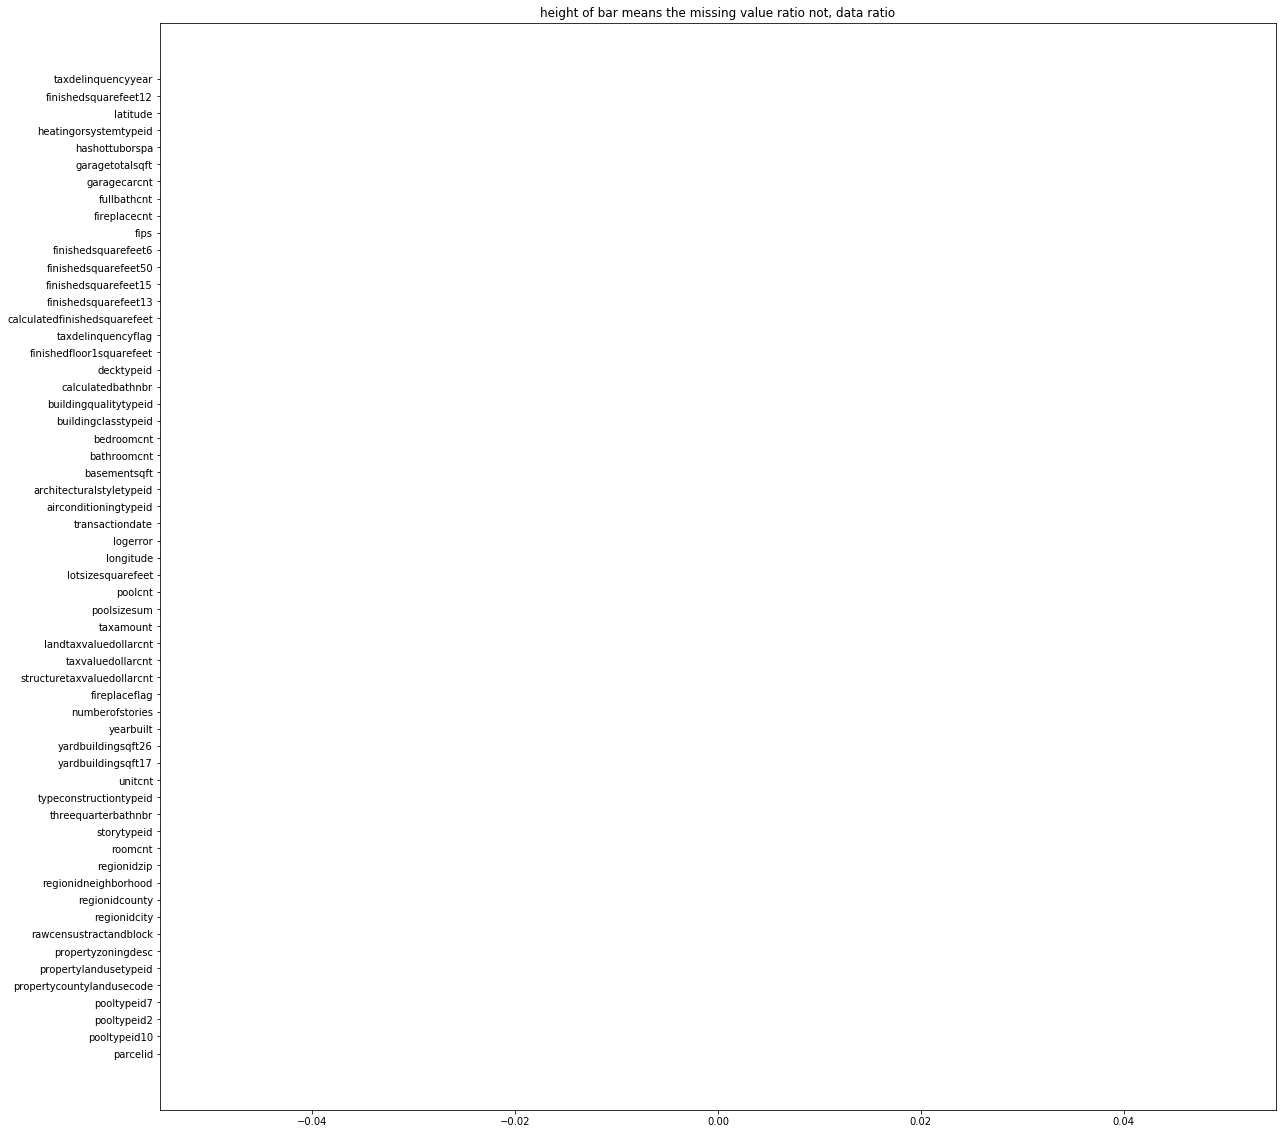

In [76]:
missing_df = train_df.isnull().sum().reset_index()
missing_df.columns = ['col','missing_cnt']
missing_df['missing_ratio'] = missing_df.missing_cnt / len(train_df)
missing_df.sort_values(by='missing_ratio',inplace=True)
missing_df.reset_index(inplace=True)
plt.figure(figsize=(20,20))
missing_df.tail()
plt.barh(missing_df.col,missing_df.missing_ratio)
plt.title('height of bar means the missing value ratio not, data ratio')
plt.show()

In [114]:
numerical_features = [col for col in train_df.columns if train_df[col].dtypes != 'object']
categorical_features = [col for col in train_df.columns if train_df[col].dtypes == 'object']
len(numerical_features),len(categorical_features)

(36, 22)

In [131]:
numerical_features.remove('transactiondate')
numerical_features.remove('logerror')
numerical_features.remove('parcelid')

In [119]:
correl_val = []
for col in numerical_features:
    correl_val.append(np.corrcoef(train_df['logerror'],train_df[col])[0][1])
len(correl_val)
correl_val = sorted(correl_val)

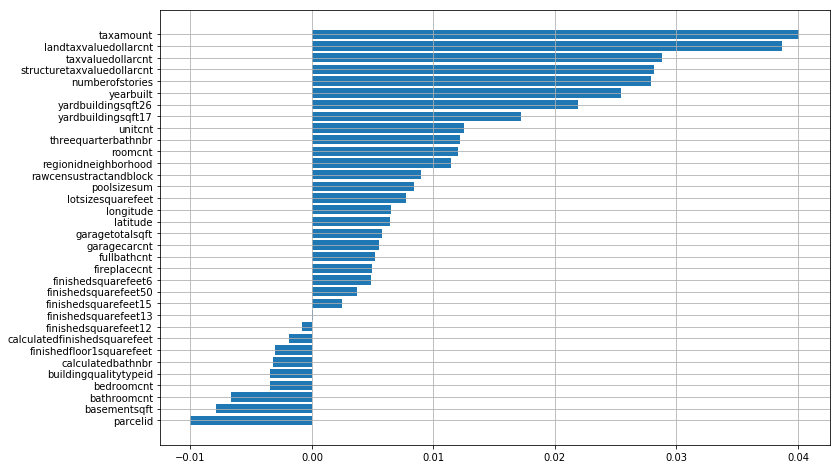

In [120]:
plt.figure(figsize=(12,8))
plt.grid(True)
plt.barh(numerical_features,correl_val)
plt.show()

<Figure size 1800x1800 with 0 Axes>

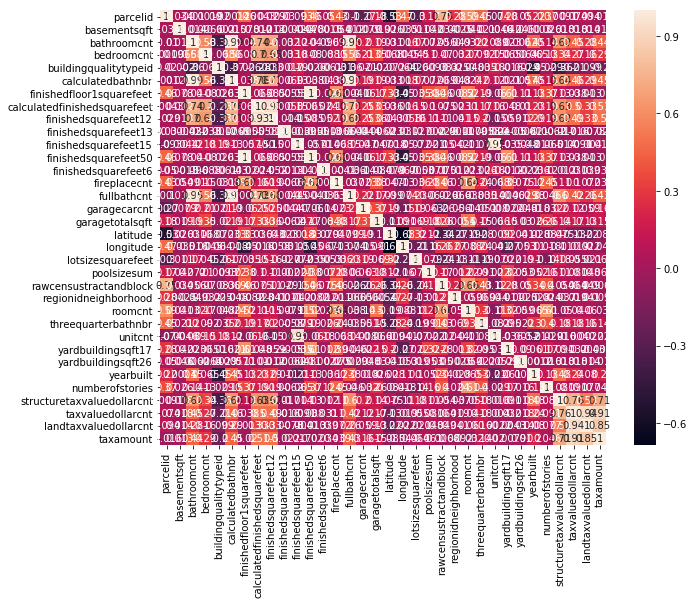

In [121]:
plt.figure(figsize=(25,25))
corrmat = train_df[numerical_features].corr(method = 'spearman')
plt.figure(figsize=(10,8))
sns.heatmap(corrmat,annot=True)
plt.show()

### Comment:
- 이는 독립변수 간의 상관관계를 나타내는 heatmap을 그려본 것이다.
- 상관관계가 높은 columns들이 있음을 알 수 있다.
- 높은 상관관계를 띄고 있기 때문에 선형회귀모형 가정을 충족시키기 위해서 일부 컬럼의 삭제가 진행되어야 한다.
- 나머지 컬럼들에 대한 처리는 후에 진행될 VIF 와 함께 추가적으로 실시한다.

# Feature Engineering
- Categorical Feature engineering
- Numerical Feature engineering

## Categorical Feature Engineering
- Encoding the column data

In [133]:
numeric_dfX = train_df[numerical_features]
categoric_dfX = train_df[categorical_features]
dfy = train_df['logerror']

In [123]:
len(categoric_dfX.columns)

22

In [124]:
categoric_dfX.columns

Index(['airconditioningtypeid', 'architecturalstyletypeid',
       'buildingclasstypeid', 'decktypeid', 'fips', 'hashottuborspa',
       'heatingorsystemtypeid', 'poolcnt', 'pooltypeid10', 'pooltypeid2',
       'pooltypeid7', 'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'regionidcity', 'regionidcounty', 'regionidzip',
       'storytypeid', 'typeconstructiontypeid', 'fireplaceflag',
       'taxdelinquencyflag', 'taxdelinquencyyear'],
      dtype='object')

In [127]:
for col in categoric_dfX.columns[:10]:
    categoric_dfX.col = dmatrix('C('+col+')+0',train_df)    

In [125]:
for col in categoric_dfX.columns[10:20]:
    categoric_dfX.col = dmatrix('C('+col+')+0',train_df)

/home/hskimim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [126]:
for col in categoric_dfX.columns[20:]:
    categoric_dfX.col = dmatrix('C('+col+')+0',train_df)

F-test 를 통한 변수 중요도 검증

In [ ]:
sm.stats.anova_lm(cat_result).sort_values(by='PR(>F)')

- 해당 컬럼의 중요도가 0이다 라는 귀무가설에 대한 신뢰수준을 나타내는 PR(>F) 부분에 대해서 점검을 한다.
- 우선 중요도값이 NaN이 나온 컬럼들을 제거해준다.
- 또한 자릿수가 e-01인 컬럼들도 제거해준다.

## Numerical Data Feature Engineering

In [136]:
numerical_features

['basementsqft',
 'bathroomcnt',
 'bedroomcnt',
 'buildingqualitytypeid',
 'calculatedbathnbr',
 'finishedfloor1squarefeet',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'finishedsquarefeet13',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'finishedsquarefeet6',
 'fireplacecnt',
 'fullbathcnt',
 'garagecarcnt',
 'garagetotalsqft',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'poolsizesum',
 'rawcensustractandblock',
 'regionidneighborhood',
 'roomcnt',
 'threequarterbathnbr',
 'unitcnt',
 'yardbuildingsqft17',
 'yardbuildingsqft26',
 'yearbuilt',
 'numberofstories',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'landtaxvaluedollarcnt',
 'taxamount']

## VIF

In [138]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [145]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(numeric_dfX.values, i) for i in range(numeric_dfX.shape[1])]
vif["features"] = numeric_dfX.columns
vif.sort_values(by='VIF Factor',inplace=True)
vif.reset_index(drop=True,inplace=True)
vif

/home/hskimim/anaconda3/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,1.017133e+00,basementsqft
1,1.032643e+00,yardbuildingsqft26
2,1.034781e+00,finishedsquarefeet13
3,1.056457e+00,lotsizesquarefeet
4,1.066433e+00,regionidneighborhood
5,1.247919e+00,buildingqualitytypeid
6,1.343713e+00,poolsizesum
7,1.368757e+00,unitcnt
8,1.492663e+00,yardbuildingsqft17
9,1.867789e+00,numberofstories


- 다른 독립변수에 의존하는 변수들을 제거해준다. 이를 통해 다중공선성을 방지한다.
- VIF가 infinite가 나오는 calculatedbathnbr , fullbathcnt 를 제거해주고, 상대적으로 높은 수가 나오는 threequarterbathnbr, taxvaluedollarcnt landtaxvaluedollarcnt 또한 제거한다.

In [146]:
numeric_dfX.drop(columns=['calculatedbathnbr','fullbathcnt','threequarterbathnbr','taxvaluedollarcnt','landtaxvaluedollarcnt'],inplace=True)

/home/hskimim/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


## F 검정을 사용한 변수 중요도 비교

In [148]:
numeric_dfX.columns

Index(['basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fireplacecnt',
       'garagecarcnt', 'garagetotalsqft', 'latitude', 'longitude',
       'lotsizesquarefeet', 'poolsizesum', 'rawcensustractandblock',
       'regionidneighborhood', 'roomcnt', 'unitcnt', 'yardbuildingsqft17',
       'yardbuildingsqft26', 'yearbuilt', 'numberofstories',
       'structuretaxvaluedollarcnt', 'taxamount'],
      dtype='object')

In [151]:
model = sm.OLS.from_formula('logerror ~ 0+ scale(basementsqft)+ scale(bathroomcnt) +scale(bedroomcnt)+ scale(buildingqualitytypeid) +scale(finishedfloor1squarefeet) +scale(calculatedfinishedsquarefeet) +scale(finishedsquarefeet12)+ scale(finishedsquarefeet13) +scale(finishedsquarefeet15) +scale(finishedsquarefeet50) +scale(finishedsquarefeet6) +scale(fireplacecnt) +scale(garagecarcnt)+ scale(garagetotalsqft)+ scale(latitude) +scale(longitude) +scale(lotsizesquarefeet) +scale(poolsizesum)+ scale(rawcensustractandblock)+ scale(regionidneighborhood)+ scale(roomcnt)+ scale(unitcnt) +scale(yardbuildingsqft17)+ scale(yardbuildingsqft26)+ scale(yearbuilt)+ scale(numberofstories)+ scale(structuretaxvaluedollarcnt)+ scale(taxamount)',train_df)

In [152]:
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     12.67
Date:                Wed, 04 Jul 2018   Prob (F-statistic):           3.51e-58
Time:                        21:30:35   Log-Likelihood:                 36685.
No. Observations:               90275   AIC:                        -7.331e+04
Df Residuals:                   90247   BIC:                        -7.305e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
sc

In [153]:
sm.stats.anova_lm(result,typ=2).sort_values(by='PR(>F)')

,sum_sq,df,F,PR(>F)
scale(taxamount),3.524818,1.0,135.657128,2.497159e-31
scale(structuretaxvaluedollarcnt),0.647390,1.0,24.915623,6.000631e-07
scale(poolsizesum),0.289842,1.0,11.154937,8.384230e-04
scale(finishedsquarefeet6),0.225198,1.0,8.667044,3.240988e-03
scale(basementsqft),0.152482,1.0,5.868477,1.541633e-02
scale(calculatedfinishedsquarefeet),0.140334,1.0,5.400935,2.012818e-02
scale(bathroomcnt),0.106345,1.0,4.092811,4.306892e-02
scale(garagetotalsqft),0.083244,1.0,3.203747,7.347311e-02
scale(lotsizesquarefeet),0.080504,1.0,3.098317,7.837664e-02
scale(finishedfloor1squarefeet),0.055916,1.0,2.152001,1.423877e-01


- summary에서 t검정에서 나온 유의확률이 50% 이상인 항목들을 모두제거한 후에 다시 OLS를 실시한다.
- bedroomcnt, buildingqualitytypeid, finishedsquarefeet12, gargagecarcnt, longtitude, roomcnt, unitcnt, yearbuilt, numberofstories 

In [162]:
numeric_dfX.drop(columns=['bedroomcnt', 'buildingqualitytypeid', 'finishedsquarefeet12', 'garagecarcnt', 'longitude', 'roomcnt', 'unitcnt', 'yearbuilt', 'numberofstories'],inplace=True)

/home/hskimim/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [157]:
revised_model = sm.OLS.from_formula('logerror ~ 0+ scale(basementsqft)+ scale(bathroomcnt) +scale(finishedfloor1squarefeet) +scale(calculatedfinishedsquarefeet) + scale(finishedsquarefeet13) +scale(finishedsquarefeet15) +scale(finishedsquarefeet50) +scale(finishedsquarefeet6) +scale(fireplacecnt) + scale(garagetotalsqft)+ scale(latitude) +scale(lotsizesquarefeet) +scale(poolsizesum)+ scale(rawcensustractandblock)+ scale(regionidneighborhood) + scale(yardbuildingsqft17)+ scale(yardbuildingsqft26) + scale(structuretaxvaluedollarcnt)+ scale(taxamount)',train_df)

In [158]:
revised_result = revised_model.fit()
print(revised_result.summary())

                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     18.62
Date:                Wed, 04 Jul 2018   Prob (F-statistic):           2.39e-63
Time:                        21:40:51   Log-Likelihood:                 36684.
No. Observations:               90275   AIC:                        -7.333e+04
Df Residuals:                   90256   BIC:                        -7.315e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
sc

In [159]:
sm.stats.anova_lm(revised_result,typ=2).sort_values(by='PR(>F)')

,sum_sq,df,F,PR(>F)
scale(taxamount),3.769980,1.0,145.105041,2.160955e-33
scale(calculatedfinishedsquarefeet),2.780994,1.0,107.039344,4.507457e-25
scale(structuretaxvaluedollarcnt),0.740480,1.0,28.500768,9.388686e-08
scale(finishedsquarefeet6),0.507623,1.0,19.538216,9.872193e-06
scale(poolsizesum),0.288427,1.0,11.101447,8.629502e-04
scale(finishedsquarefeet15),0.268308,1.0,10.327061,1.311398e-03
scale(basementsqft),0.152920,1.0,5.885833,1.526512e-02
scale(bathroomcnt),0.112657,1.0,4.336109,3.731490e-02
scale(garagetotalsqft),0.102120,1.0,3.930555,4.741933e-02
scale(lotsizesquarefeet),0.084336,1.0,3.246055,7.159893e-02


## 변수 변환

In [164]:
len(numeric_dfX.columns)

19

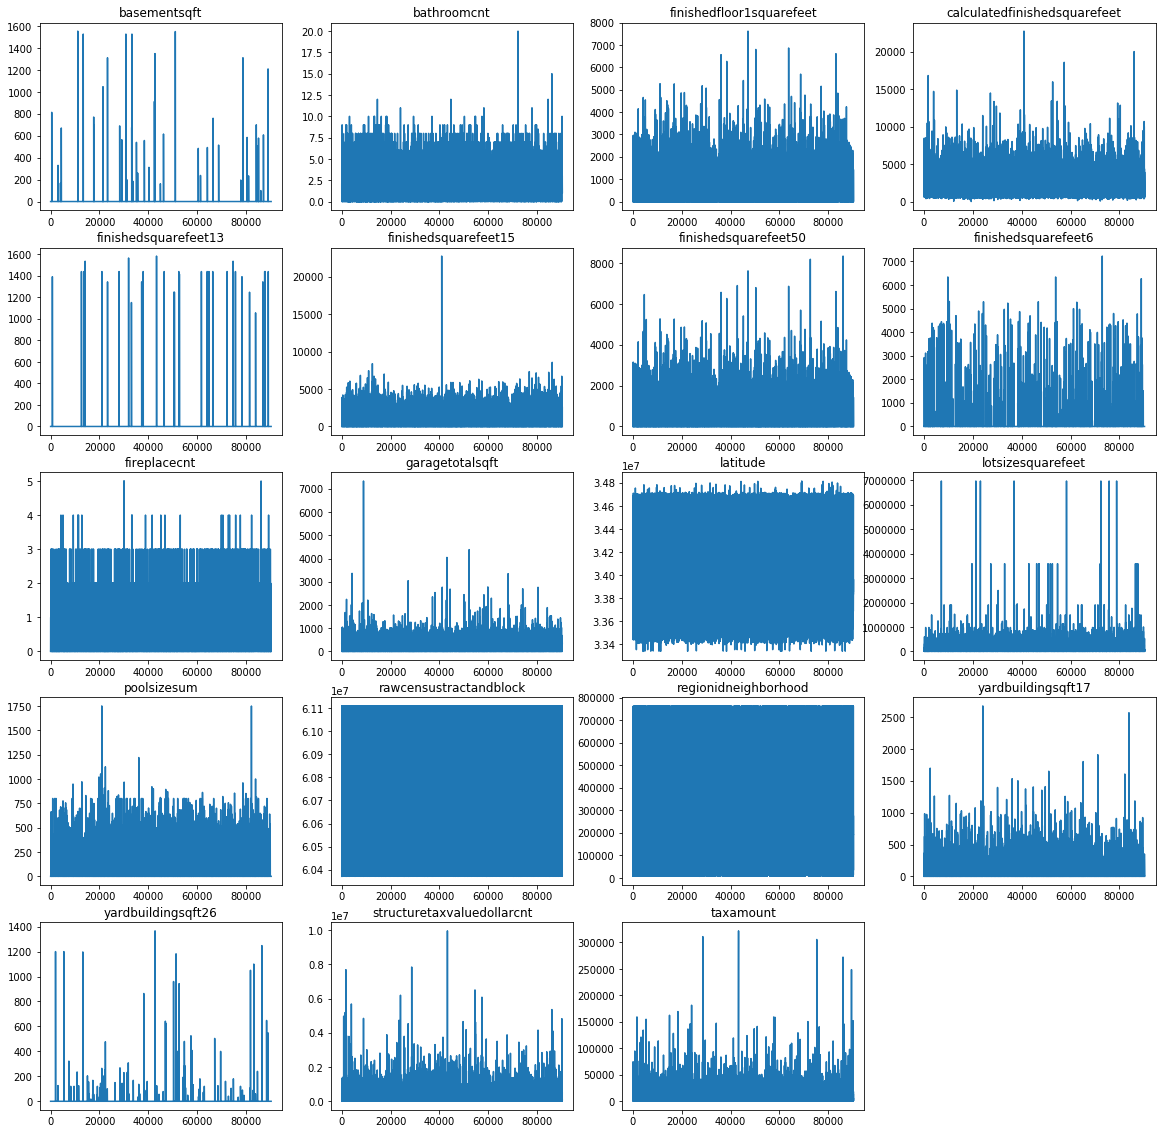

In [172]:
plt.figure(figsize=(20,20))
for idx,col in enumerate(numeric_dfX.columns):
    plt.subplot(5,4,idx+1)
    plt.plot(numeric_dfX[col].index,numeric_dfX[col].values)
    plt.title(col)
plt.show()

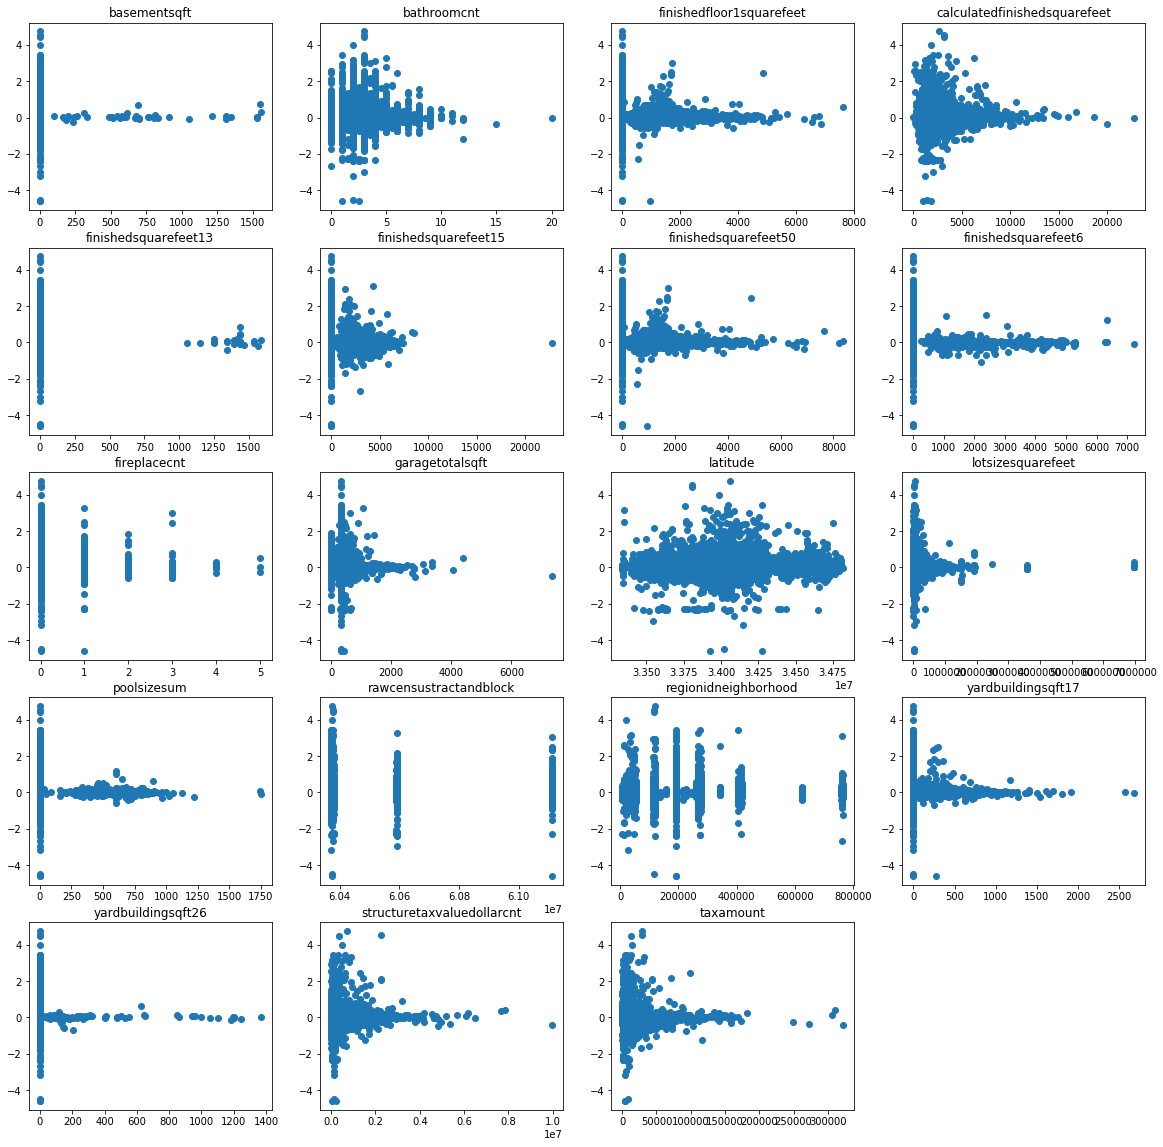

In [178]:
plt.figure(figsize=(20,20))
for idx,col in enumerate(numeric_dfX.columns):
    plt.subplot(5,4,idx+1)
    plt.scatter(numeric_dfX[col].values,train_df.logerror)
    plt.title(col)
plt.show()

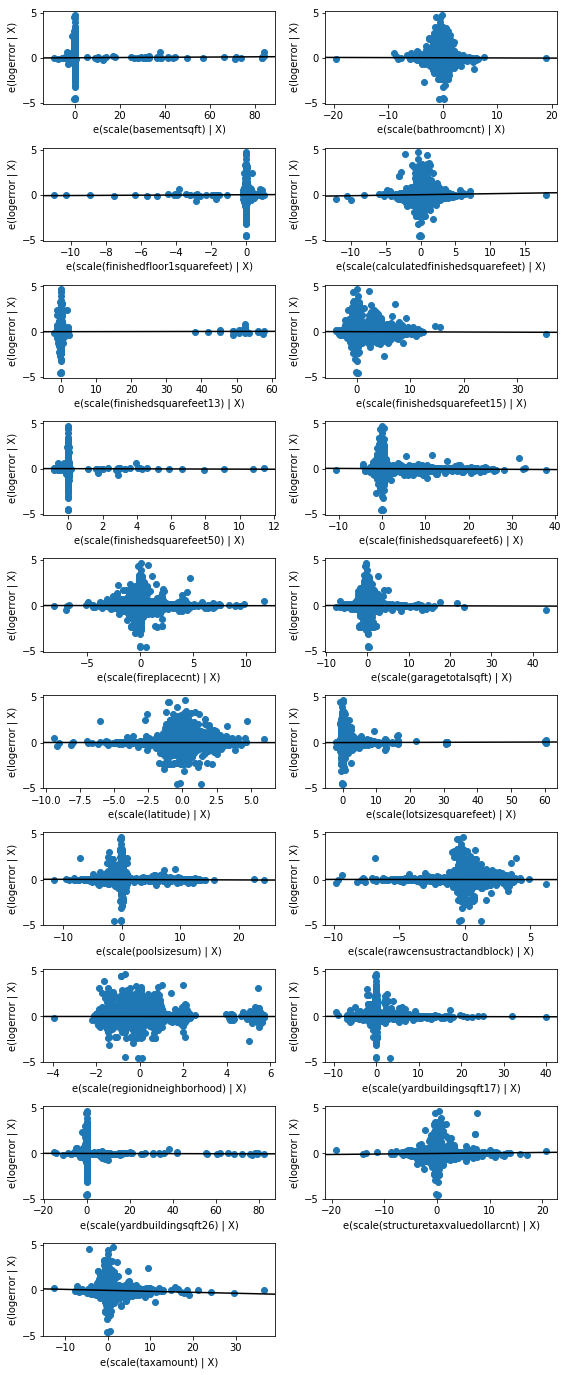

In [179]:
fig = plt.figure(figsize=(8, 20))
sm.graphics.plot_partregress_grid(revised_result, fig=fig)
fig.suptitle("")
plt.show()

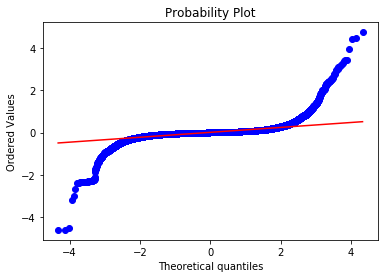

In [183]:
sp.stats.probplot(revised_result.resid, plot=plt)
plt.show()

/home/hskimim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


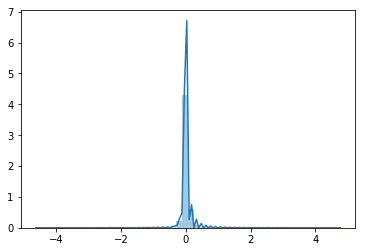

In [184]:
sns.distplot(revised_result.resid)
plt.show()

## Leverage & Outlier

In [ ]:
influence = revised_result.get_influence()
hat = influence.hat_matrix_diag

plt.figure(figsize=(10, 2))
plt.stem(hat)
plt.show()

KeyboardInterrupt: 